# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!


In [1]:
import pandas as pd
import numpy as np



# Challenge 1 -  Explore the Internal Dataset

In this lab, we will start off by working with the wine dataset in scikit-learn. We will select the wine dataset and use a clustering algorithm to learn more about the functionalities of this library. 

We start off by loading the dataset using the `load_wine` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)). In the cell below, we will import the function from scikit-learn.

In [2]:
from sklearn.datasets import load_wine

In the cell below, use the `load_wine` function and assign the wine dataset to a variable called `wine`.

In [3]:
wine = load_wine()

In the next step, list the keys of the variable `wine` to examine its contents. Note that the `load_wine` function does not return dataframes. It returns you a Python dictionary.

In [4]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Next, list the feature names. These are the different characteristics of the wine. 

In [5]:
wine.feature_names



['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Print the description of the dataset in the cell below using the `DESCR` attribute of the `wine` variable.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the print function.*

In [6]:
print(wine.DESCR)


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### From the description, we see that all columns are numeric. We also know that there is no missing data 

Let's plot the alcohol content histogram. Recall that we are working with a numpy array and will need to use a matplotlib function to produce a histogram. 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

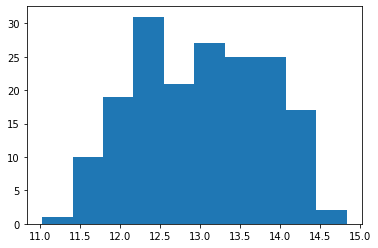

In [8]:
wine_df = pd.DataFrame(wine.data)
plt.hist(wine_df[0])
plt.show()

# Challenge 2 - Clustering the Internal Dataset

In this portion of the lab, we will cluster the data to find common traits between the different wines. We will use the k-means clustering algorithm to achieve this goal.

#### We start by importing k-means from scikit-learn and then proceed to create 4 clusters.

In [9]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters = 4).fit(wine_df)


#### Print the cluster labels.

In [11]:

clusters = pd.Index(kmeans.labels_)



#### Compute the size of each cluster. This can be done by counting the number of occurrences of each unique label in the list above.

Which is the largest cluster of the 4?

In [12]:
clusters.value_counts()

1    59
3    57
2    39
0    23
dtype: int64

In [13]:
#The largest cluster is 0 with 59. 

#### Inspect the shape of `wine['data']`

In [14]:
wine['data'].shape


(178, 13)

#### Inspect the first 5 records in `wine['data']`

In [15]:
print(wine['data'][:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


You now know the data object is a 2-dimensional array in which there are 178 rows and 13 columns. Each row is a data record and each column is a feature.

#### What is the average ash content for each cluster? 

*Hints:* 

* *Ash* is the 3rd column.

* The data object is not a Pandas dataframe so you can't apply `pandas.DataFrame.groupby`. Instead, you can use `np.average`.

In [16]:
np.average(wine_df[2])

2.3665168539325845

# Challenge 3 - Load and Explore an External Dataset

We will now load an external dataset using Pandas and use scikit learn to explore the data. In this portion of the lab, we will use a [patient dataset from Kaggle](https://www.kaggle.com/miles99/patient-admission-dataset-for-learning-data-mining). 

In [17]:
patients = pd.read_csv('../patient-admission-dataset-for-learning-data-mining.csv')

In the next cell, print the first five rows of the data using the `head()` function.

In [18]:
patients.head()

,id,patient_name,patient_email,doctor_phone,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,patient_nhs_number,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,1,Celestyna Dillimore,cdillimore0@dion.ne.jp,674-914-1212,Female,10/18/2018,False,True,59,176,8.200152e+09,Sarena Waliszek,5/1/2018,True,True,triamcinolone acetonide,I669
1,2,Meta Michieli,mmichieli1@loc.gov,172-580-3586,Female,2/8/2018,False,True,77,186,NaN,Farris Robinet,12/7/2017,True,True,NaN,NaN
2,3,Cordie Sancto,csancto2@cafepress.com,794-222-5085,Female,10/9/2018,True,True,90,177,6.145594e+09,Kaspar Spitaro,10/5/2018,False,False,NaN,NaN
3,4,Josh De Ambrosis,jde3@amazon.co.jp,856-540-5195,Male,9/10/2018,True,True,70,150,NaN,Rafferty Fowls,10/21/2018,False,True,NaN,NaN
4,5,Delinda Alfonsini,dalfonsini4@opensource.org,938-978-1131,Female,2/26/2018,False,True,82,140,4.804758e+08,Glenna MacNeachtain,11/15/2018,False,False,NaN,NaN


Next, print the column types and check which columns have been misclassified by pandas.

In [19]:
patients.dtypes


id                        int64
patient_name             object
patient_email            object
doctor_phone             object
patient_gender           object
patient_dob              object
patient_diabetic           bool
patient_allergic           bool
patient_weight_kg         int64
patient_height_sm         int64
patient_nhs_number      float64
doctor_name              object
appointment_date         object
patient_show               bool
is_regular_visit           bool
prescribed_medicines     object
diagnosis                object
dtype: object

#### We can see that none of the date columns have been correctly classified. Also, some columns contain qualitative data that can be dropped.

First, transform the `patient_dob` and `appointment_date` columns to datetime using the `pd.to_datetime` function.

In [20]:
pd.to_datetime(patients['patient_dob'])
pd.to_datetime(patients['appointment_date'])



0     2018-05-01
1     2017-12-07
2     2018-10-05
3     2018-10-21
4     2018-11-15
5     2018-11-12
6     2018-02-21
7     2018-02-02
8     2018-01-01
9     2018-08-08
10    2018-01-28
11    2018-01-21
12    2018-10-31
13    2018-08-24
14    2017-12-18
15    2018-08-30
16    2018-01-22
17    2018-03-06
18    2018-11-02
19    2018-05-15
20    2018-10-10
21    2018-04-21
22    2018-08-26
23    2018-09-09
24    2018-03-12
25    2017-11-23
26    2017-11-29
27    2018-08-21
28    2017-11-27
29    2018-08-22
         ...    
970   2018-11-15
971   2018-09-09
972   2018-08-05
973   2018-08-18
974   2018-06-28
975   2018-10-16
976   2018-09-17
977   2018-10-15
978   2018-09-07
979   2018-07-19
980   2018-08-31
981   2018-09-07
982   2018-10-06
983   2018-11-16
984   2018-05-21
985   2018-08-30
986   2018-02-15
987   2018-10-07
988   2018-11-15
989   2018-08-12
990   2018-01-15
991   2018-09-03
992   2018-06-10
993   2017-12-10
994   2018-05-10
995   2018-01-12
996   2017-12-12
997   2018-05-

Next, drop the `id`, `patient_name`, `patient_email`, `patient_nhs_number`, and `doctor_phone` columns. These are not quantitative columns and will not contribute to our analysis.

In [21]:
patients.drop(['id', 'patient_name','patient_email', 'patient_nhs_number', 'doctor_phone'] , axis=1, inplace = True)


Now we work on the missing data. Most ML algorithms will not perform as intended if there are missing data.

In the cell below, count how many rows contain missing data in each column. You should see three columns contain missing data:

* `doctor_name`: 58 missing data
* `prescribed_medicines`: 488 missing data
* `diagnosis`: 488 missing data

In [22]:
patients.isna().sum()

patient_gender            0
patient_dob               0
patient_diabetic          0
patient_allergic          0
patient_weight_kg         0
patient_height_sm         0
doctor_name              58
appointment_date          0
patient_show              0
is_regular_visit          0
prescribed_medicines    488
diagnosis               488
dtype: int64

The main issues are found in the `prescribed_medicines` and `diagnosis` columns. Can we simply drop these rows?

The answer is not yet. Because when there are missing data in these columns, it doesn't mean the data records are broken. Instead, it means no medication was prescribed and no diagnosis was recorded. Therefore, once we fill in the missing data these columns will be fine. But we'll revisit these columns and decide whether we will eventually drop them when we look at how many unique values are there in these categorical columns.  

For the `prescribed_medicines` column, fill the missing values with the value `no prescription`. For the `diagnosis` column, fill the missing values with `no diagnosis`.

*Hint: Use [`pandas.DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html).*

In [23]:
patients['prescribed_medicines'].fillna('no prescription',inplace = True)
patients['diagnosis'].fillna('no diagnosis', inplace = True)


How about `doctor_name`? Since a doctor visit without a doctor name might not be meaningful, we will drop these rows.

In [24]:
patients.dropna(subset=['doctor_name'], inplace = True)



In [25]:
patients.isna().sum()

patient_gender          0
patient_dob             0
patient_diabetic        0
patient_allergic        0
patient_weight_kg       0
patient_height_sm       0
doctor_name             0
appointment_date        0
patient_show            0
is_regular_visit        0
prescribed_medicines    0
diagnosis               0
dtype: int64

In [26]:
patients.head()

,patient_gender,patient_dob,patient_diabetic,patient_allergic,patient_weight_kg,patient_height_sm,doctor_name,appointment_date,patient_show,is_regular_visit,prescribed_medicines,diagnosis
0,Female,10/18/2018,False,True,59,176,Sarena Waliszek,5/1/2018,True,True,triamcinolone acetonide,I669
1,Female,2/8/2018,False,True,77,186,Farris Robinet,12/7/2017,True,True,no prescription,no diagnosis
2,Female,10/9/2018,True,True,90,177,Kaspar Spitaro,10/5/2018,False,False,no prescription,no diagnosis
3,Male,9/10/2018,True,True,70,150,Rafferty Fowls,10/21/2018,False,True,no prescription,no diagnosis
4,Female,2/26/2018,False,True,82,140,Glenna MacNeachtain,11/15/2018,False,False,no prescription,no diagnosis


#### Another step in preprocessing that can be performed by scikit-learn is label encoding. 

We have 4 columns that are of `bool` type. We would like to convert them to an integer column containing either zero or one. We can do this using [scikit-learn's label encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In the cell below, import the label encoder and encode the 4 boolean columns (*patient_diabetic*, *patient_allergic*, *patient_show*, *is_regular_visit*) with `0` and `1`. 

In [27]:
cols_label = patients[['patient_diabetic', 'patient_allergic', 'patient_show', 'is_regular_visit']]



In [28]:
patients = patients[[x for x in patients.columns if x != 'patient_diabetic' and x != 'patient_allergic' and x != 'patient_show' and x !='is_regular_visit']]


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols_encoded = cols_label.apply(le.fit_transform)


In [30]:
patients = pd.concat([patients, cols_encoded], axis = 'columns')

Print the data dtypes to confirm those four `bool` columns are converted to `int64`.

In [31]:
patients.dtypes

patient_gender          object
patient_dob             object
patient_weight_kg        int64
patient_height_sm        int64
doctor_name             object
appointment_date        object
prescribed_medicines    object
diagnosis               object
patient_diabetic         int64
patient_allergic         int64
patient_show             int64
is_regular_visit         int64
dtype: object

#### The last step is to handle the `object` data.

There are 4 `object` columns now: `patient_gender`, `doctor_name`, `prescribed_medicines`, and `diagnosis`. The gender columns

In the next cell, check the unique values of each of the `object` columns using `value_counts()`.

In [32]:
# patients['patient_gender'].value_counts()
# patients['doctor_name'].value_counts()
# patients['prescribed_medicines'].value_counts()
# patients['diagnosis'].value_counts()

#### The number of unique values is large for all three columns except `patient_gender`. We will handle these columns differently.

For `diagnosis`, there are too many unique values which will make ML difficult. However, we can re-encode the values to either with or without diagnosis. Remember at an earlier step we filled in the missing values of this column with *no diagnosis*? We can re-encode *no diagnosis* to `0` and all other values to `1`. In this way we can tremendously simply this column.

For `prescribed_medicines`, we can drop this column because it is perfectly correlated with `diagnosis`. Whenever there is no diagnosis, there is no prescribed medicine. So we don't need to keep this duplicated data.

How about `doctor_name`? There are not excessive unique values but still quite many (19). We may either drop or keep it but keeping it will make the analysis more complicated. So due to the length of this lab let's drop it.

How about `gender`? This one is easy. Just like re-encoding the boolean values, we can re-encode gender to `0` and `1` because there are only 2 unique values.

In the next cells, do the following:

1. Create a new column called `diagnosis_int` that has `0` and `1` based on the values in `diagnosis`.

1. Create a new column called `patient_gender_int` that has `0` and `1` based on the values in `patient_gender`.

1. Drop the following columns: `doctor_name`, `diagnosis`, `prescribed_medicines`, and `patient_gender`.

In [33]:
def label_diagnosis(col):
    if 'no diagnosis' in col:
        return col.replace(col, '0')
    else:
        return col.replace(col, '1')

patients['diagnosis_int'] = patients['diagnosis'].apply(label_diagnosis)
patients['diagnosis_int'] = patients['diagnosis_int'].astype(int)



In [34]:
def label_gender(col):
    if 'Female' in col:
        return col.replace(col, '0')
    else:
        return col.replace(col, "1")

patients['patient_gender_int'] = patients['patient_gender'].apply(label_gender)
patients['patient_gender_int'] = patients['patient_gender_int'].astype(int)

In [35]:
patients.drop(['doctor_name'] , axis=1, inplace = True)
patients.drop(['diagnosis'] , axis=1, inplace = True)
patients.drop(['patient_gender'] , axis=1, inplace = True)


In [36]:
patients.drop(['prescribed_medicines'] , axis=1, inplace = True)


Let's look at the head again to ensure the re-encoding and dropping are successful:

An interesting observation is that all patients are no older than 2 years. However, their weights and heights indicate that they are adults. This cannot be true. Therefore, we can either trust the weight and height columns or the DOB column. Since there are other columns that indicate that these are adults (they have emails, some have diabetes) we will drop the `patient_dob` column. We will also drop the `appointment_date` column since it has too many unique values to transform to a dummy variable. Drop the two columns in the cell below.

In [38]:
patients.drop(['patient_dob'] , axis=1, inplace = True)
patients.drop(['appointment_date'] , axis=1, inplace = True)


#### Our data is now ready for clustering. Let's use k-means again.

We start by initializing and fitting a model in the cell below. Call this model patients_cluster.

In [40]:
patients_cluster=KMeans(n_clusters=4).fit(patients)


Attach the labels to the dataframe. Do this by accessing the `labels_` in the `patients_cluster` model and assign them to a new column in `patients` that you will call `labels`.

In [43]:
patients['labels'] = patients_cluster.labels_




Now using a `groupby`, find the mean of every variable in `patients` and group by the `labels` column. This summary will allow us to see how the patients differ between the clusters. Your output should look similar to the image below.

![groupby mean](../groupby-mean.png)

Additionally, add a comment to describe which columns have the largest difference between clusters.

In [52]:
means_patients = patients.groupby('labels').mean()

In [102]:
#The max differences are:


for i in list(means_patients.columns):
    highest_values = means_patients[i].max()
    lowest_values = means_patients[i].min()
    a = means_patients[means_patients[i]==highest_values].index[0]
    b = means_patients[means_patients[i]==lowest_values].index[0]
    print('Cluster max {} and min {}, {}: {}'.format(a,b, i, highest_values-lowest_values))
    


Cluster max 2 and min 3, patient_weight_kg: 34.72444164230717
Cluster max 1 and min 0, patient_height_sm: 26.285337850555237
Cluster max 2 and min 1, patient_diabetic: 0.062392838450015364
Cluster max 3 and min 1, patient_allergic: 0.0412621760629765
Cluster max 0 and min 3, patient_show: 0.038019163542176104
Cluster max 0 and min 3, is_regular_visit: 0.060533608650763404
Cluster max 2 and min 3, diagnosis_int: 0.1417244607477885
Cluster max 0 and min 3, patient_gender_int: 0.10222970892426958


# Bonus Challenge: Visualize K-Means Clusters

How did k-means cluster the data? You can obtain an intuitive view with a scatter plot. Generate a 2-d cluster plot below using `matplotlib`. You need to choose 2 of the features from your cleaned and transformed dataset, and use color to represent the cluster label generated from k-means.

If the scatter plot does not make any sense to you, it means the features you chose to visualize are not the right ones. You should be able to see 4 clear clusters with different colors in your visualization that suggests how k-means had clustered your data.

![Cluster Visualization](../clusters.png)

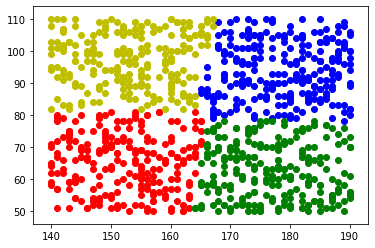

In [149]:
# x = patients[['patient_weight_kg', 'patient_height_sm']]
# y = patients['labels']

# plt.scatter(patients[patients['labels']==0]['patient_height_sm'],patients[patients['labels']==0]['patient_weight_kg'], c = 'r')
# plt.scatter(patients[patients['labels']==1]['patient_height_sm'],patients[patients['labels']==1]['patient_weight_kg'], c = 'b')
# plt.scatter(patients[patients['labels']==2]['patient_height_sm'],patients[patients['labels']==2]['patient_weight_kg'], c = 'y')
# plt.scatter(patients[patients['labels']==3]['patient_height_sm'],patients[patients['labels']==3]['patient_weight_kg'], c = 'g');


#Esto es una guarrada, el bueno es el de bajo.

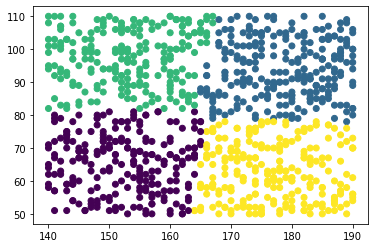

In [151]:
plt.scatter(patients['patient_height_sm'],patients['patient_weight_kg'], c = patients.labels);


Additionally, you can visualize the clusters in 3-D scatter plot. Give it a try below.

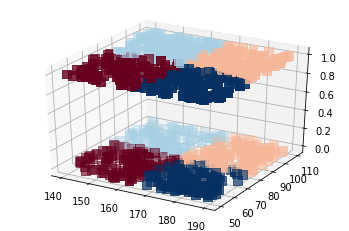

In [163]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.array(patients['patient_height_sm'])
y = np.array(patients['patient_weight_kg'])
z = np.array(patients['patient_diabetic'])

ax.scatter(x,y,z, marker="s", c=patients["labels"], s=80, cmap="RdBu")

plt.show()

